In [2]:
import numpy as np 
import pandas as pd 
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns 

In [3]:
df=pd.read_csv(r'C:\Users\ajsru\OneDrive\Desktop\SCM516\breast_cancer.csv') 

In [4]:
df.head(5)

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnose
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [5]:
y=df.loc[:,'diagnose']

In [6]:
X=df.drop('diagnose', axis=1) 

In [7]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X,y, test_size=0.3, random_state=0)

In [8]:
Xtrain; 

In [9]:
type(Xtrain)

pandas.core.frame.DataFrame

In [10]:
np.shape(Xtrain)

(478, 9)

In [11]:
model=GaussianNB() 

In [12]:
model.fit(Xtrain,Ytrain)

GaussianNB()

In [13]:
Xtest

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
113,1,1,1,1,2,5,1,1,1
378,3,1,1,1,2,1,2,1,1
303,5,5,5,2,5,10,4,3,1
504,4,7,8,3,4,10,9,1,1
301,1,1,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...
521,5,1,1,1,2,1,3,1,1
647,1,1,3,1,2,1,2,1,1
503,3,1,2,2,2,1,1,1,1
498,3,1,1,1,1,1,2,1,1


In [14]:
ypred=model.predict(Xtest) 

In [15]:
ypred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [16]:
Ytest

113    0
378    0
303    1
504    1
301    0
      ..
521    0
647    0
503    0
498    0
293    1
Name: diagnose, Length: 205, dtype: int64

In [17]:
model.score(Xtrain,Ytrain)

0.9707112970711297

In [18]:
model.score(Xtest,Ytest) 

0.9463414634146341

In [19]:
cm=confusion_matrix(ypred, Ytest)
cm

array([[121,   2],
       [  9,  73]], dtype=int64)

In [20]:
print(classification_report(ypred, Ytest))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       123
           1       0.97      0.89      0.93        82

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.94       205
weighted avg       0.95      0.95      0.95       205



<AxesSubplot:>

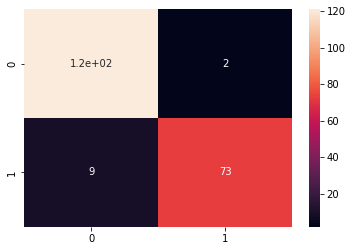

In [21]:
sns.heatmap(cm, annot=True)

In [22]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

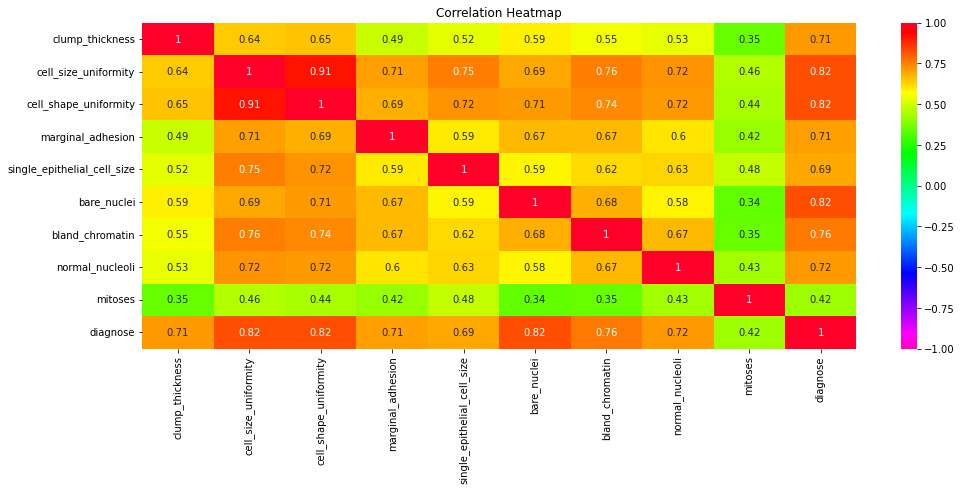

In [23]:
plt.figure(figsize=(16, 6)) 
 
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='gist_rainbow_r') 
 
heatmap.set_title('Correlation Heatmap'); 

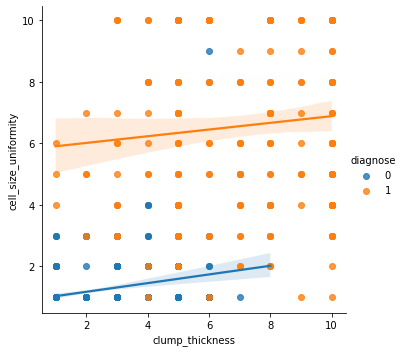

In [24]:
sns.lmplot(data=df, x='clump_thickness', y='cell_size_uniformity', hue='diagnose')

<AxesSubplot:>

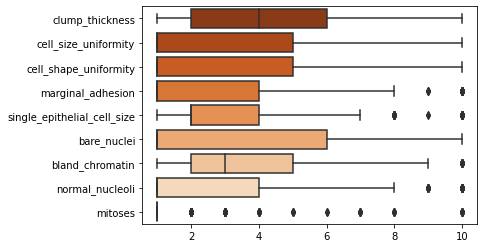

In [25]:
sns.boxplot(data=X, orient='h', palette='Oranges_r')

<AxesSubplot:>

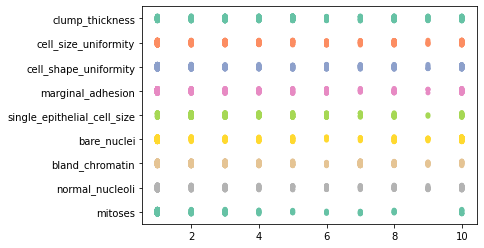

In [26]:
sns.stripplot(data=X, orient='h', palette='Set2')

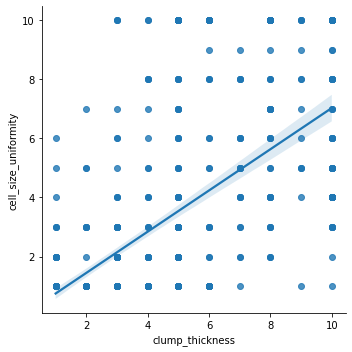

In [27]:
sns.lmplot(data=df, x='clump_thickness', y='cell_size_uniformity',palette='Set3')

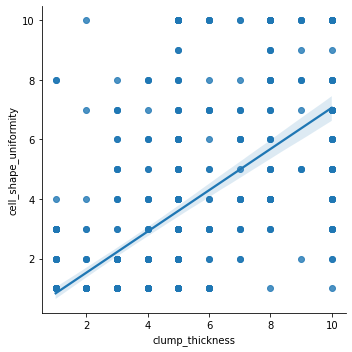

In [28]:
sns.lmplot(data=df, x='clump_thickness', y='cell_shape_uniformity')

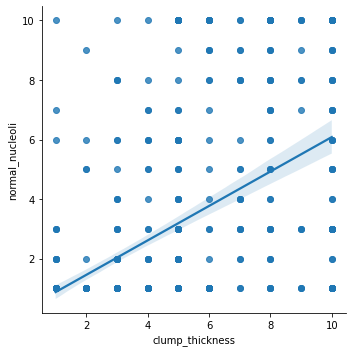

In [29]:
sns.lmplot(data=df, x='clump_thickness', y='normal_nucleoli')

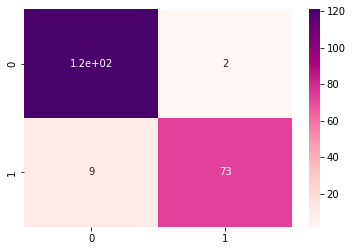

In [30]:
sns.heatmap(cm, annot=True, cmap='RdPu'); 

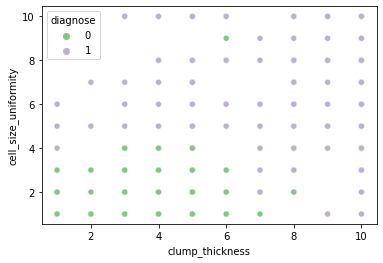

In [35]:
import seaborn as sns 
 
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y, palette='Accent');  

In [32]:
!pip install xgboost

In [33]:
from sklearn.metrics import confusion_matrix,classification_report, plot_roc_curve,roc_curve, auc 

C:\Users\ajsru\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


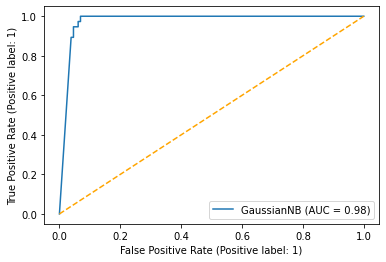

In [34]:
disp=plot_roc_curve(model, Xtest, Ytest) 
plt.plot([0,1], [0,1], color='orange', linestyle='--');